In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from atoms.hydrogen_psi import TrialPsi
from my_types.tensor_types import Position
from atoms.utils import show_density
from optimizers.optimizer import TrialPsiOptimizer
import torch

In [7]:
r_min: Position = torch.tensor([-1.0, -1.0, -1.0]).reshape(3, 1)
r_max: Position = torch.tensor([1.0, 1.0, 1.0]).reshape(3, 1)

In [8]:
t_psi = TrialPsi(r_min=r_min, r_max=r_max, num_walkers=1000)

Running warmup steps


100%|██████████| 100/100 [00:00<00:00, 14978.05it/s]


Running steps


100%|██████████| 100/100 [00:00<00:00, 11893.34it/s]


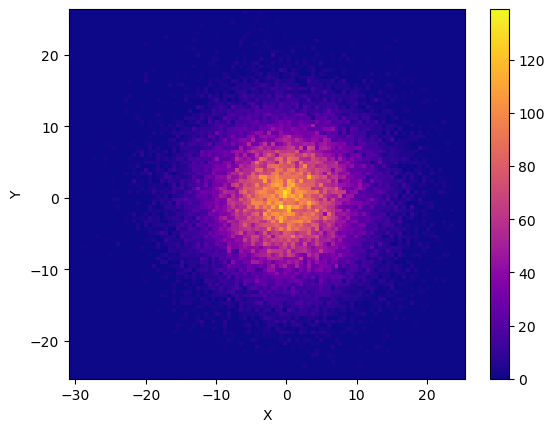

In [9]:
show_density(
    psi=t_psi,
    warmup_steps=100,
    steps=100,
    step_size=1,
    warmup_step_size=1,
    r_min=r_min,
    r_max=r_max,
    bins=100,
    show_paths=False,
)

In [13]:
tp = TrialPsi(r_min=r_min, r_max=r_max, num_walkers=100)
tp.theta

tensor([0.0033])

In [12]:
tp_opt = TrialPsiOptimizer(psi=tp, lr=100)
E_loc = tp_opt.optimize(num_opt_iters=50, num_warmup=1000, num_steps=1000, step_size=1)

NameError: name 'TrialPsiOptimizer' is not defined

In [ ]:
tp.theta